## Data Loader, visulization and Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import os
import torch
from torch.utils.data import Dataset
from PIL import Image, ImageDraw
import numpy as np
from torchvision import transforms

In [13]:
!git clone 'https://github.com/israelcamp/EfficientDetDoesEAST.git'

Cloning into 'EfficientDetDoesEAST'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 225 (delta 90), reused 192 (delta 57), pack-reused 0
Receiving objects: 100% (225/225), 32.31 MiB | 20.47 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [4]:
!unzip '/content/drive/MyDrive/dataset_effDet_segmentation.zip' -d '/content/'

Archive:  /content/drive/MyDrive/dataset_effDet_segmentation.zip
   creating: /content/dataset_updated/
  inflating: /content/dataset_updated/1.png  
  inflating: /content/dataset_updated/2.png  
  inflating: /content/dataset_updated/2_2.png  
  inflating: /content/dataset_updated/3.png  
  inflating: /content/dataset_updated/3_2.png  
  inflating: /content/dataset_updated/4.png  
  inflating: /content/dataset_updated/4_2.png  
  inflating: /content/dataset_updated/5.png  
  inflating: /content/dataset_updated/5_2.png  
  inflating: /content/dataset_updated/6.png  
  inflating: /content/dataset_updated/6_2.png  
  inflating: /content/dataset_updated/7.png  
  inflating: /content/dataset_updated/7_2.png  
  inflating: /content/dataset_updated/8.png  
  inflating: /content/dataset_updated/8_2.png  
  inflating: /content/dataset_updated/9.png  
  inflating: /content/dataset_updated/9_2.png  
  inflating: /content/dataset_updated/10.png  
  inflating: /content/dataset_updated/11.png  
  in

In [5]:
import json
import os
from PIL import Image, ImageDraw
from torchvision import transforms
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, image_transform=None, mask_transform=None):
        """
        Args:
            root_dir (string): Directory with all the images and JSON files.
            image_transform (callable, optional): Optional transform to be applied on an image.
            mask_transform (callable, optional): Optional transform to be applied on a mask.
        """
        self.root_dir = root_dir
        self.image_transform = image_transform
        self.mask_transform = mask_transform
        self.img_files = [f for f in os.listdir(root_dir) if f.endswith('.png')]

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.img_files[idx])
        json_file = img_name.replace('.png', '.json')

        with open(json_file) as f:
            annotations = json.load(f)['annotations']

        # Load image
        image = Image.open(img_name).convert('RGB')

        # Create an empty mask
        mask = Image.new('L', image.size, 0)

        # Create a draw object
        draw = ImageDraw.Draw(mask)

        # Draw polygons on the mask
        for annotation in annotations:
            if 'polygon' in annotation:  # Check if polygon data exists
                polygon = annotation['polygon']['paths']
                polygon_points = [tuple(point.values()) for path in polygon for point in path]
                draw.polygon(polygon_points, outline=1, fill=1)

        # Apply transformations
        if self.image_transform is not None:
            image = self.image_transform(image)
        if self.mask_transform is not None:
            mask = self.mask_transform(mask)

        return image, mask

# Example usage
image_transform = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
    # Add any other image transformations here
])

# Masks generally don't require normalization, but resizing is essential to match image dimensions
mask_transform = transforms.Compose([
    transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.NEAREST),
    transforms.ToTensor(),
])


dataset = CustomDataset(root_dir='/content/dataset_updated', image_transform=image_transform, mask_transform=mask_transform)


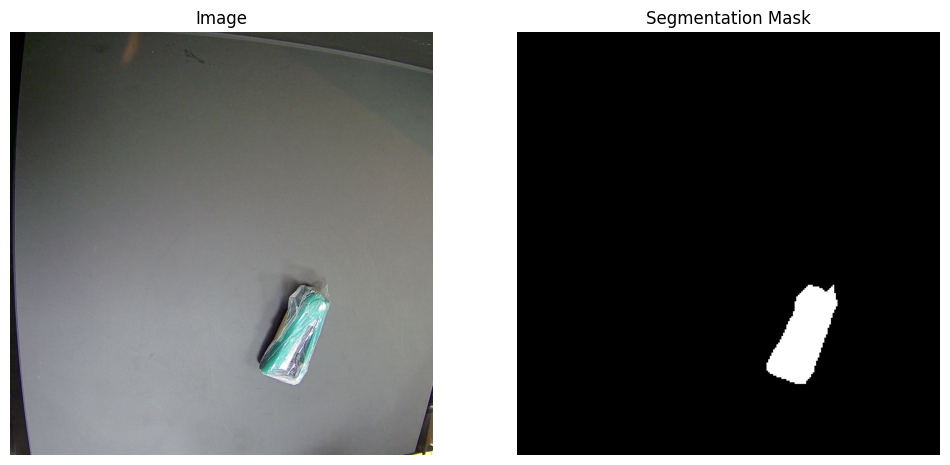

In [6]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# Assuming you've defined the CustomDataset class as before and instantiated it as `dataset`

def visualize_sample(dataset, idx):
    # Convert tensor to PIL Image for visualization
    to_pil = ToPILImage()

    # Get the image and mask from the dataset
    img, mask = dataset[idx]

    # Convert tensors back to PIL images (if using ToTensor transform)
    img = to_pil(img)
    mask = to_pil(mask)

    # Create a figure to display the images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[0].axis('off')

    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')

    plt.show()

# Visualize the first image and its mask
visualize_sample(dataset, 1)

# If you want to visualize a second image, you can call it again with a different index
# visualize_sample(dataset, 1)


In [14]:
cd /content/EfficientDetDoesEAST

/content/EfficientDetDoesEAST


In [8]:
!pip install kornia
!pip install efficientnet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

## Model

In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from pycocotools.coco import COCO
import os
import numpy as np
from torch import nn
from effdet.east.model import EfficientDetDoesEAST



In [16]:
# from effdet.segmentation.model import EfficientDetForSemanticSegmentation

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset and DataLoader setup
data_loader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)

# Model setup
# model = EfficientDetForSemanticSegmentation(advprop=True, compound_coef=2)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [17]:
class DiceLoss(nn.Module):

    def forward(self, y_true, scores, eps=1e-8):
        # compute the actual dice score
        dims = (1, 2)
        intersection = torch.sum(scores * y_true, dims)
        cardinality = torch.sum(scores + y_true, dims)

        dice_score = 2. * intersection / (cardinality + eps)
        return torch.mean(-dice_score + 1.)

In [18]:
class EffDetSegmentationPart(EfficientDetDoesEAST):

    def forward(self, x):
        _, _, height, width = x.shape
        feats = self.backbone(x)

        scores = self.scores(feats)
        scores = torch.sigmoid(scores)

        score_map = scores[:, 0] # take only the segmentation scores
        return score_map

In [19]:
model = EffDetSegmentationPart(advprop=True, compound_coef=4)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/adv-efficientnet-b4-44fb3a87.pth" to /root/.cache/torch/hub/checkpoints/adv-efficientnet-b4-44fb3a87.pth
100%|██████████| 74.4M/74.4M [00:01<00:00, 69.9MB/s]


Loaded pretrained weights for efficientnet-b4


In [20]:
loss_fn = DiceLoss()

## Training

In [21]:

def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    model.backbone.freeze_bn() # freeze BN

    model.zero_grad()
    for imgs, targets in data_loader:
        imgs = imgs.to(device)
        targets = targets.to(device)

        # loss_dict = model(imgs, targets)  # Adjust according to your model's output
        scores = model(imgs.to(device))
        losses =  loss_fn(scores, targets)
        # losses = sum(loss for loss in loss_dict.values())
        if losses.isnan().item():
            model.zero_grad()
            break
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        print(f"Epoch: {epoch}, Loss: {losses.item()}")

In [22]:

model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
model.backbone.backbone_net.requires_grad_(False)
# Optimizer setup
# optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training loop
num_epochs = 15
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, data_loader, device, epoch)
    # save your model at the end of every epoch

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0, Loss: 0.999039351940155
Epoch: 0, Loss: 0.9996379613876343
Epoch: 0, Loss: 0.9990720748901367
Epoch: 0, Loss: 0.9991071224212646
Epoch: 0, Loss: 0.9995269775390625
Epoch: 0, Loss: 0.9994218945503235
Epoch: 0, Loss: 0.9988276958465576
Epoch: 0, Loss: 0.9993083477020264
Epoch: 0, Loss: 0.9990793466567993
Epoch: 0, Loss: 0.9990923404693604
Epoch: 0, Loss: 0.9989641904830933
Epoch: 0, Loss: 0.9994118213653564
Epoch: 0, Loss: 0.9995887279510498
Epoch: 0, Loss: 0.999354362487793
Epoch: 0, Loss: 0.9994572401046753
Epoch: 1, Loss: 0.9993075132369995
Epoch: 1, Loss: 0.9991121292114258
Epoch: 1, Loss: 0.9990511536598206
Epoch: 1, Loss: 0.9990438222885132
Epoch: 1, Loss: 0.9992392659187317
Epoch: 1, Loss: 0.9991233348846436
Epoch: 1, Loss: 0.9997640252113342
Epoch: 1, Loss: 0.9988659024238586
Epoch: 1, Loss: 0.9992339015007019
Epoch: 1, Loss: 0.9994051456451416
Epoch: 1, Loss: 0.9993013143539429
Epoch: 1, Loss: 0.9993304014205933
Epoch: 1, Loss: 0.9995321035385132
Epoch: 1, Loss: 0.9991

## Inference

In [ ]:
from torchvision import transforms
from PIL import Image
import torch

# Put the model in evaluation mode
model.eval()

# Define the transforms. This should match your training transforms as closely as possible.
transform = transforms.Compose([
    transforms.Resize((1024, 1024)),  # Adjust size as per your model's training
    transforms.ToTensor(),
    # If you used normalization in your training, apply the same here
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load an image
image_path = '/content/EfficientDetDoesEAST/dataset_updated/2.png'
image_org = Image.open(image_path).convert('RGB')

# Apply the transforms
image = transform(image_org)

# Add a batch dimension (CNNs expect batches)
image_sq = image.unsqueeze(0)

# If using GPU for inference
image_sq = image_sq.cuda()

# Perform the inference
with torch.no_grad():
    output = model(image_sq)

print(output)
# Post-processing

threshold = 0.6  # Example threshold
predicted_mask = (output.squeeze() > threshold).cpu().numpy()


tensor([[[2.1783e-30, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         ...,
         [6.7535e-26, 0.0000e+00, 0.0000e+00,  ..., 9.9854e-01,
          9.9959e-01, 9.9615e-01],
         [3.7279e-21, 0.0000e+00, 0.0000e+00,  ..., 9.9845e-01,
          9.9821e-01, 9.8748e-01],
         [4.7941e-13, 3.3162e-26, 0.0000e+00,  ..., 9.6029e-01,
          9.5167e-01, 8.8505e-01]]], device='cuda:0')


In [ ]:
## Inference on multiple images and save the output
from torchvision import transforms
from PIL import Image, ImageOps
import torch
import numpy as np
import os
from matplotlib import pyplot as plt

# Assuming your model is defined as 'model'
model.eval()

# Define the transforms
transform = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
    # If you used normalization in your training, apply the same here
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

directory_path = '/content/dataset_updated/'  # Directory containing the images
output_directory = '/content/drive/MyDrive/output_images/'  # Make sure this directory exists

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for filename in os.listdir(directory_path):
    if filename.endswith('.png'):  # or any other file extensions
        image_path = os.path.join(directory_path, filename)
        image_org = Image.open(image_path).convert('RGB')

        # Apply the transforms
        image = transform(image_org)

        # Add a batch dimension
        image_sq = image.unsqueeze(0)

        # If using GPU for inference
        image_sq = image_sq.cuda()

        # Perform the inference
        with torch.no_grad():
            output = model(image_sq)

        # Post-processing
        threshold = 0.6
        predicted_mask = (output.squeeze() > threshold).cpu().numpy()

        mask_image = Image.fromarray((predicted_mask * 255).astype(np.uint8))
        mask_image = mask_image.resize(image_org.size, Image.BILINEAR)
        overlay_image = ImageOps.colorize(mask_image, black="black", white="red")
        blended_image = Image.blend(image_org.convert("RGBA"), overlay_image.convert("RGBA"), alpha=0.5)

        # Save the blended image
        save_path = os.path.join(output_directory, f"blended_{filename}")
        blended_image.save(save_path)


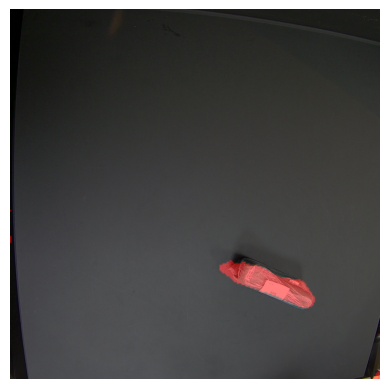

In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Assuming `predicted_mask` and the original `image` are available from the previous steps

# Step 1: Convert the predicted mask to a PIL image
mask_image = Image.fromarray((predicted_mask * 255).astype(np.uint8))

# Ensure the original image is a PIL image and not a PyTorch tensor; if it was a tensor, convert it back to PIL.
# Assuming `image` is the original PIL image you used for input.
# Note: No conversion code shown here because it's based on an earlier assumption that `image` is already a PIL image.

# Step 2: Resize mask to match the original image's size
# Correctly access the size property of the PIL Image object
mask_image = mask_image.resize(image_org.size, Image.BILINEAR)

# Proceed with the remaining steps as before


# Step 3: Convert the mask to a colored overlay (e.g., red)
overlay_image = ImageOps.colorize(mask_image, black ="black", white ="red")

# Create a blend of the original image and the overlay
blended_image = Image.blend(image_org.convert("RGBA"), overlay_image.convert("RGBA"), alpha=0.5)

# Display the blended image
plt.imshow(blended_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


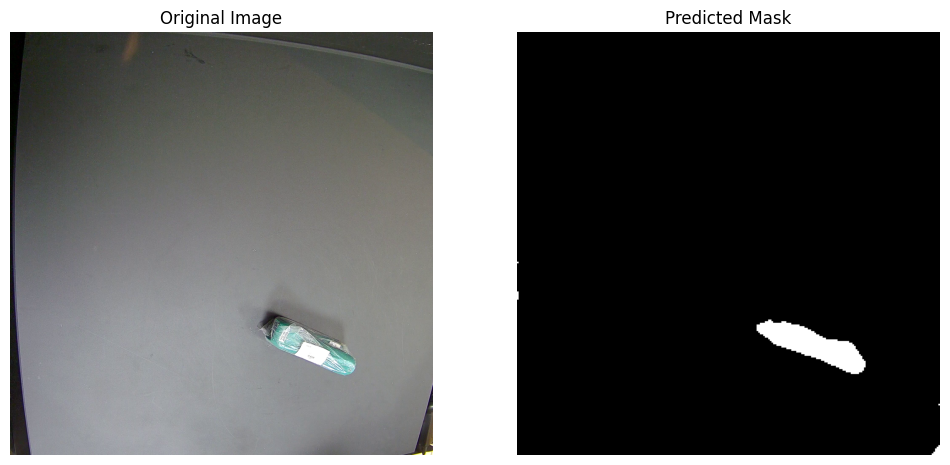

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original image for visualization
original_image = Image.open(image_path)

# Ensure the original image and the mask are numpy arrays for plotting
original_image_np = np.array(original_image)
predicted_mask_np = predicted_mask.astype(np.float32)  # Ensuring the mask is float for visualization

# Creating a figure to display the images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
ax[0].imshow(original_image_np)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Display the predicted mask
# If the predicted mask is not binary (e.g., multi-class), you might need a colormap, e.g., 'viridis'
ax[1].imshow(predicted_mask_np, cmap='gray')
ax[1].set_title('Predicted Mask')
ax[1].axis('off')

plt.show()


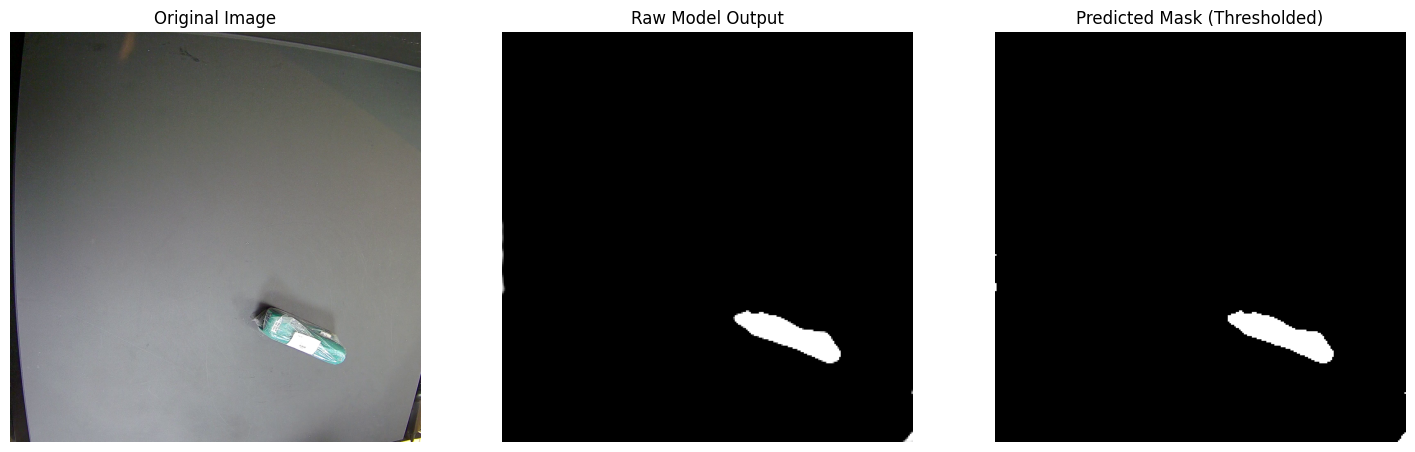

Raw output - Min: 0.0 Max: 1.0
Threshold used: 0.6


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `output` is the raw output from the model before any thresholding
output_np = output.squeeze().cpu().numpy()  # Adjust depending on your model's output shape

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(original_image_np)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Visualize the raw model output
ax[1].imshow(output_np, cmap='gray')
ax[1].set_title('Raw Model Output')
ax[1].axis('off')

# Visualize the thresholded mask
ax[2].imshow(predicted_mask_np, cmap='gray')
ax[2].set_title('Predicted Mask (Thresholded)')
ax[2].axis('off')

plt.show()

# Print out some diagnostic information
print("Raw output - Min:", np.min(output_np), "Max:", np.max(output_np))
print("Threshold used:", threshold)
